In [1]:
import pandas as pd
import numpy as np

### Data Types

Two main data types in pandas:
+ Series (1-dimensional)
    + Python list input `pd.Series(list)`
+ Dataframe (2-dimensional)
    + Python dictionary input `pd.DataFrame(dict)`
    
Both series and dataframes start with index 0 by deafult, but can user specify with the `index=[list]` keyword argument. Indices do not need to be integers.\
`Axis = 0` refers to rows \
`Axis = 1` refers to columns

In [18]:
car_series = pd.Series(["BMW", "Toyota", "Honda"])

car_series

0       BMW
1    Toyota
2     Honda
dtype: object

In [32]:
car_series = pd.Series(["BMW", "Toyota", "Honda"], index=['one', 'two', 'three'])

car_series

one         BMW
two      Toyota
three     Honda
dtype: object

In [19]:
car_df = pd.DataFrame({"Car Make": car_series, "Colour": pd.Series(["Red", "Blue", "White"])})

car_df

,Car Make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,White


### Reading Data

Can use the pandas `read_csv(filename)` command to read a csv file into a dataframe

In [2]:
df = pd.read_csv("car-sales.csv")

df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Also possible to read csv files from a URL (e.g from a GitHub repository) using the same method.

### Exporting Data

Can use the pandas `to_csv(filename)` command to export a dataframe to a csv. 

Pandas will automatically export the index as a column, so to need to use the `index=False` keyword argument if not required.

In [14]:
df.to_csv("exported-car-sales.csv", index=False)

### Describing Data

#### Attributes
Can use the following pandas attributes to describe the data:
+ `.dtypes` - tells you which data type each column is
+ `.columns` - returns list of column names
+ `.index` - gives the range and interval of the dataframe index
+ `.shape` - gives the number of rows and columns in the dataframe
    + Can get number of rows using len(df)
    + Can get number of columns using len(df.columns)

In [22]:
df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [19]:
df.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [46]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [47]:
df.shape

(10, 7)

#### Methods
Can use the following pandas methods to describe the data:
+ `.describe()` - gives some basic stats about the numerical data
+ `.info()` - gives some general information on the dataset (incl. column names, number of null objects in each column, dtypes, etc)
+ `.mean()` - gives the mean value of numerical columns
+ `.max()` - gives the max value of numerical columns
+ `.min()` - gives the min value of numerical columns
+ `.sum()` - gives the sum value of numerical columns

In [23]:
df.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [37]:
df.mean(numeric_only=True)

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [48]:
print(f'Max mileage: {df["Odometer (KM)"].max()}')
print(f'Min mileage: {df["Odometer (KM)"].min()}')
print(f'Total mileage: {df["Odometer (KM)"].sum()}')

Max mileage: 213095
Min mileage: 11179
Total mileage: 786014


### Viewing and Selecting Data

#### Head / Tail
Can use the `.head()` and `.tail()` method to show first or last entires of the dataframe. The number of entries returned is 5 by default, but can specifying the number of entries to return by adding a number within the brackets.

In [12]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [11]:
df.tail(3)

,Make,Colour,Odometer (KM),Doors,Price
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


#### loc / iloc
Can use the `.loc[]` method to locate an entry with an index defined within the square brackets.

The `iloc[]` method locates an entry with respect to position within the dataframe, regardless of index. iloc can also be used to locate specific data points with respect to columns and rows using the notation:

```python
iloc[row_index, col_index]
```

If the dataframe index begins at 0 and has an increment of 1 per row, then iloc and loc will return the same entry if only one argument is entered. Both methods can be used with a range within the square brackets as well as an individual value.

In [20]:
df.loc[8]

Make                Toyota
Colour               White
Odometer (KM)        60000
Doors                    4
Price            $6,250.00
Name: 8, dtype: object

In [21]:
df.iloc[0]

Make                Toyota
Colour               White
Odometer (KM)       150043
Doors                    4
Price            $4,000.00
Name: 0, dtype: object

In [24]:
df.loc[2:4]

,Make,Colour,Odometer (KM),Doors,Price
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [33]:
print(f'The value in the 3rd row and 5th column is: {df.iloc[2,4]}')

The value in the 3rd row and 5th column is: $7,000.00


#### Boolean indexing
Data can be filtered with square bracket notation and standard mathematical operators (Boolean indexing), for example to return rows where a certain condition is met.

In [70]:
df[df["Make"] == "Toyota"]

,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,Toyota,White,150043.0,4.0,"$4,000",5.0,7.8
2,Toyota,Blue,NaN,3.0,"$7,000",5.0,6.8
5,Toyota,Green,NaN,4.0,"$4,500",5.0,5.9
8,Toyota,White,60000.0,NaN,NaN,NaN,8.1


In [39]:
df[df["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


#### Crosstab
Can compare two or more columns using the `crosstab()` method. This returns the frequency of each combination (by default). The output will display the first input as the rows and the second input as the columns by default, but can modify with the `index=` and `columns=` keyword arguments.

Can return data other than just the frequency by using the `values=` and `aggfunc=` keyword arguments.

The crosstab method is a pandas method, not a dataframe method so must be called using `pd.crosstab(index, column, **kwargs)`

In [47]:
pd.crosstab(df["Make"], df["Colour"])

Make,BMW,Honda,Nissan,Toyota
Colour,,,,
Black,1,0,0,0
Blue,0,2,0,1
Green,0,0,0,1
Red,0,1,0,0
White,0,0,2,2


In [48]:
pd.crosstab(columns=df["Make"], index=df["Doors"])

Make,BMW,Honda,Nissan,Toyota
Doors,,,,
3,0,0,0,1
4,0,3,2,3
5,1,0,0,0


In [94]:
pd.crosstab(df["Make"], df["Colour"], values=df["Odometer (KM)"], aggfunc=np.mean)

Colour,Black,Blue,Green,Red,White
Make,,,,,
BMW,11179.0,NaN,NaN,NaN,NaN
Honda,NaN,50218.0,NaN,87899.0,NaN
Nissan,NaN,NaN,NaN,NaN,122347.5
Toyota,NaN,32549.0,99213.0,NaN,105021.5


#### Groupby

The `.groupby()` method groups the data according to categories.

For example, when used with `.mean()`, it will return the mean value of numerical columns with respect to the specified column. Can combine with Boolean indexing for more specific results.

In [ ]:
# First, converting price column to numeric
df["Price"] = df["Price"].str.replace('[\$\,]', '').astype(float)

In [100]:
df.groupby(["Make"]).mean()

,Odometer (KM),Doors,Price
Make,,,
BMW,11179.000000,5.00,22000.0
Honda,62778.333333,4.00,6500.0
Nissan,122347.500000,4.00,6600.0
Toyota,85451.250000,3.75,5437.5


In [101]:
# e.g, to find the max values for white Toyotas only

df[(df["Make"] == "Toyota") & (df["Colour"] == "White")].groupby(["Make", "Colour"]).max()

,,Odometer (KM),Doors,Price
Make,Colour,,,
Toyota,White,150043,4,6250.0


### Manipulating Data

In [100]:
df = pd.read_csv("car-sales-missing-data.csv")

df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


#### NaNs

Pandas assigns missing data as a 'NaN'. \
Can fill NaN values in selected columns using the `.fillna()` method. The value to fill goes within the brackets.

When manipulating data, many methods have an `inplace` parameter. Typically this is False by default, but if set to true, it will overwrite the data in the dataset. This is the same as reassigning the data manually.

Can remove rows with NaNs with the `dropna()` method. 

In [99]:
df["Odometer"].fillna(100.0, inplace=True)

# Same as:
#df["Odometer"] = df["Odometer"].fillna(100.0)

df

,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,Toyota,White,36631.591797,4.0,"$4,000",5.0,7.8
1,Honda,Red,21459.716797,4.0,"$5,000",5.0,7.5
2,Toyota,Blue,100.000000,3.0,"$7,000",5.0,6.8
3,BMW,Black,2729.248047,5.0,"$22,000",5.0,9.2
4,Nissan,White,52025.146484,4.0,"$3,500",5.0,8.7
5,Toyota,Green,100.000000,4.0,"$4,500",5.0,5.9
6,Honda,NaN,100.000000,4.0,"$7,500",5.0,7.0
7,Honda,Blue,100.000000,4.0,NaN,5.0,7.3
8,Toyota,White,14648.437500,NaN,NaN,NaN,8.1
9,NaN,White,7714.843750,4.0,"$9,700",NaN,7.8


##### Missingno Library

Can use the `missingno` library to visualise NaN data within the dataframe, for example within a matrix using `missingno.matrix(dataframe)`. Other missingno methods include `bar()`, `heatmap()` and `dendrogram()`.

In [21]:
import missingno as msno

<AxesSubplot:>

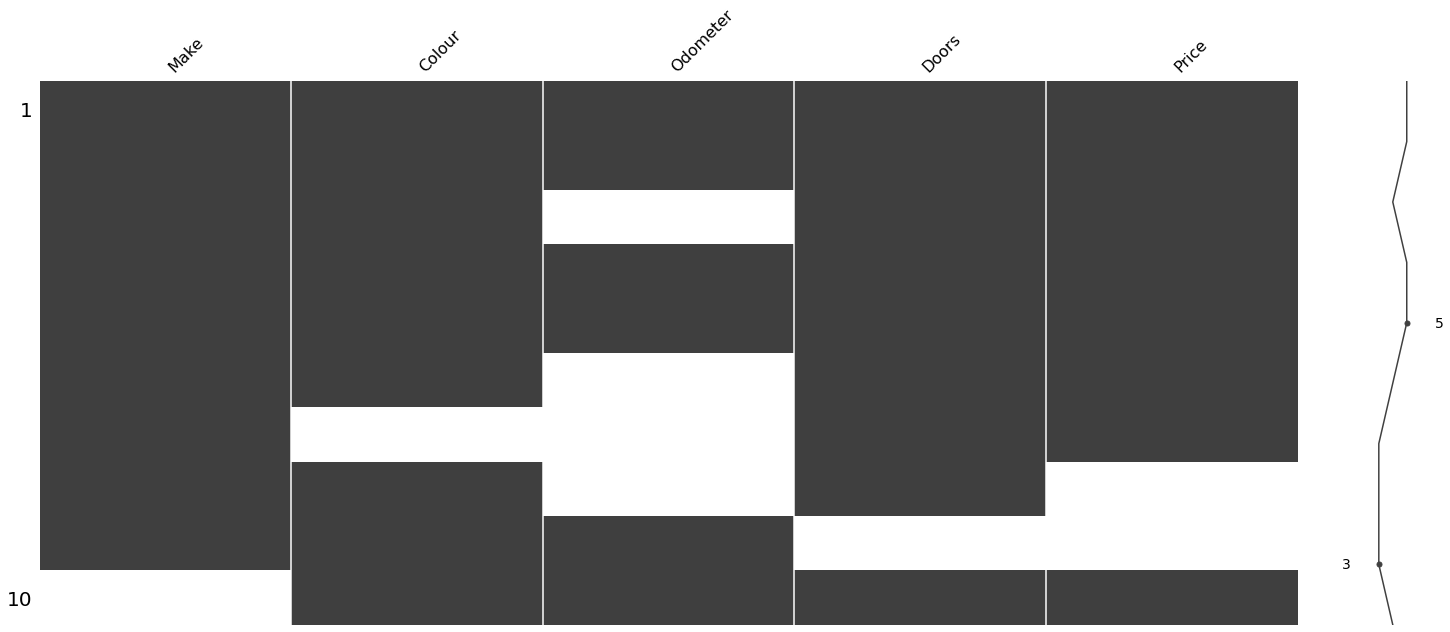

In [27]:
msno.matrix(df)

In [28]:
df.dropna(inplace=True)

df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


#### Adding Data

Can add columns to dataframe by creating a pandas series and assigning to the dataframe with the column name in square brackets. If the series does not contain the same number of rows as the dataframe, the difference will be populated with NaNs. 

Can also add columns using Python list notation. The number of items in the Python list must match the number of rows in the dataframe. 

Can add columns by manipulating existing columns, for example with mathematical operators.

In [59]:
df["Seats"] = pd.Series([5, 5, 5, 5, 5, 5, 5, 5])

df

,Make,Colour,Odometer,Doors,Price,Seats
0,Toyota,White,150043.0,4.0,"$4,000",5.0
1,Honda,Red,87899.0,4.0,"$5,000",5.0
2,Toyota,Blue,NaN,3.0,"$7,000",5.0
3,BMW,Black,11179.0,5.0,"$22,000",5.0
4,Nissan,White,213095.0,4.0,"$3,500",5.0
5,Toyota,Green,NaN,4.0,"$4,500",5.0
6,Honda,NaN,NaN,4.0,"$7,500",5.0
7,Honda,Blue,NaN,4.0,NaN,5.0
8,Toyota,White,60000.0,NaN,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700",NaN


In [60]:
df["Rating"] = [7.8, 7.5, 6.8, 9.2, 8.7, 5.9, 7.0, 7.3, 8.1, 7.8]
# Length of list must equal length of dataframe

df

,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,Toyota,White,150043.0,4.0,"$4,000",5.0,7.8
1,Honda,Red,87899.0,4.0,"$5,000",5.0,7.5
2,Toyota,Blue,NaN,3.0,"$7,000",5.0,6.8
3,BMW,Black,11179.0,5.0,"$22,000",5.0,9.2
4,Nissan,White,213095.0,4.0,"$3,500",5.0,8.7
5,Toyota,Green,NaN,4.0,"$4,500",5.0,5.9
6,Honda,NaN,NaN,4.0,"$7,500",5.0,7.0
7,Honda,Blue,NaN,4.0,NaN,5.0,7.3
8,Toyota,White,60000.0,NaN,NaN,NaN,8.1
9,NaN,White,31600.0,4.0,"$9,700",NaN,7.8


In [106]:
df["Odometer (miles)"] = round(df["Odometer"] / 1.6, 3)

df

,Make,Colour,Odometer,Doors,Price,Doors adj,Odometer (miles)
0,Toyota,White,93776.875,4.0,"$4,000",8.0,58610.547
1,Honda,Red,54936.875,4.0,"$5,000",8.0,34335.547
2,Toyota,Blue,NaN,3.0,"$7,000",6.0,NaN
3,BMW,Black,6986.875,5.0,"$22,000",10.0,4366.797
4,Nissan,White,133184.375,4.0,"$3,500",8.0,83240.234
5,Toyota,Green,NaN,4.0,"$4,500",8.0,NaN
6,Honda,NaN,NaN,4.0,"$7,500",8.0,NaN
7,Honda,Blue,NaN,4.0,NaN,8.0,NaN
8,Toyota,White,37500.000,NaN,NaN,NaN,23437.500
9,NaN,White,19750.000,4.0,"$9,700",8.0,12343.750


#### Removing Data

Can remove data using the `drop()` method. 
+ To remove a row, use `axis=0` parameter
+ To remove a column, use `axis=1` parameter

Can also drop data based on certain parameters, for example using comparison operators.

Remember the `inline=True` parameter to overwrite the dataframe with the updates.

In [65]:
# Drop a row
df.drop(5, axis=0)

,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,Toyota,White,150043.0,4.0,"$4,000",5.0,7.8
1,Honda,Red,87899.0,4.0,"$5,000",5.0,7.5
2,Toyota,Blue,NaN,3.0,"$7,000",5.0,6.8
3,BMW,Black,11179.0,5.0,"$22,000",5.0,9.2
4,Nissan,White,213095.0,4.0,"$3,500",5.0,8.7
6,Honda,NaN,NaN,4.0,"$7,500",5.0,7.0
7,Honda,Blue,NaN,4.0,NaN,5.0,7.3
8,Toyota,White,60000.0,NaN,NaN,NaN,8.1
9,NaN,White,31600.0,4.0,"$9,700",NaN,7.8


In [68]:
# Drop a column
df.drop("Seats", axis=1)

,Make,Colour,Odometer,Doors,Price,Rating
0,Toyota,White,150043.0,4.0,"$4,000",7.8
1,Honda,Red,87899.0,4.0,"$5,000",7.5
2,Toyota,Blue,NaN,3.0,"$7,000",6.8
3,BMW,Black,11179.0,5.0,"$22,000",9.2
4,Nissan,White,213095.0,4.0,"$3,500",8.7
5,Toyota,Green,NaN,4.0,"$4,500",5.9
6,Honda,NaN,NaN,4.0,"$7,500",7.0
7,Honda,Blue,NaN,4.0,NaN,7.3
8,Toyota,White,60000.0,NaN,NaN,8.1
9,NaN,White,31600.0,4.0,"$9,700",7.8


In [66]:
# Remove all Hondas with a rating over 7.1
df.drop(df[(df["Make"] == "Honda") & (df["Rating"] > 7.1)].index)

,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,Toyota,White,150043.0,4.0,"$4,000",5.0,7.8
2,Toyota,Blue,NaN,3.0,"$7,000",5.0,6.8
3,BMW,Black,11179.0,5.0,"$22,000",5.0,9.2
4,Nissan,White,213095.0,4.0,"$3,500",5.0,8.7
5,Toyota,Green,NaN,4.0,"$4,500",5.0,5.9
6,Honda,NaN,NaN,4.0,"$7,500",5.0,7.0
8,Toyota,White,60000.0,NaN,NaN,NaN,8.1
9,NaN,White,31600.0,4.0,"$9,700",NaN,7.8


#### Changing Data

Can apply functions to data using the `.apply()` method.

In [101]:
# To change odometer column from km to miles
df["Odometer"] = df["Odometer"].apply(lambda x: x / 1.6)

df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,93776.875,4.0,"$4,000"
1,Honda,Red,54936.875,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,6986.875,5.0,"$22,000"
4,Nissan,White,133184.375,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,37500.000,NaN,NaN
9,NaN,White,19750.000,4.0,"$9,700"


#### Shuffling / Sampling Data

Can use the pandas `.sample()` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) to return a random subset of the data, in a random row order. The `frac` parameter determines the fraction of items to return, as a decimal. If no fraction is provided, one item will be returned by default. If fraction is 1, the whole dataframe will be returned in a random row order.

Sampling is useful for creating training/test sets for machine learning algorithms.

The `reset_index()` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) will re-index the sample data, starting with 0. Use `drop=True` to remove the jumbled index from the data.

In [86]:
df.sample()

,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,Toyota,White,150043.0,4.0,"$4,000",5.0,7.8


In [89]:
df_samp = df.sample(frac=0.5)

df_samp

,Make,Colour,Odometer,Doors,Price,Seats,Rating
2,Toyota,Blue,NaN,3.0,"$7,000",5.0,6.8
1,Honda,Red,87899.0,4.0,"$5,000",5.0,7.5
8,Toyota,White,60000.0,NaN,NaN,NaN,8.1
3,BMW,Black,11179.0,5.0,"$22,000",5.0,9.2
4,Nissan,White,213095.0,4.0,"$3,500",5.0,8.7


In [90]:
df_samp.reset_index()

,index,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,2,Toyota,Blue,NaN,3.0,"$7,000",5.0,6.8
1,1,Honda,Red,87899.0,4.0,"$5,000",5.0,7.5
2,8,Toyota,White,60000.0,NaN,NaN,NaN,8.1
3,3,BMW,Black,11179.0,5.0,"$22,000",5.0,9.2
4,4,Nissan,White,213095.0,4.0,"$3,500",5.0,8.7


In [92]:
df_samp.reset_index(drop=True)

,Make,Colour,Odometer,Doors,Price,Seats,Rating
0,Toyota,Blue,NaN,3.0,"$7,000",5.0,6.8
1,Honda,Red,87899.0,4.0,"$5,000",5.0,7.5
2,Toyota,White,60000.0,NaN,NaN,NaN,8.1
3,BMW,Black,11179.0,5.0,"$22,000",5.0,9.2
4,Nissan,White,213095.0,4.0,"$3,500",5.0,8.7
